Метод Зейделя. Выполнил Гарнов Юрий 795 группа.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


A = U + D + L

(U + D) * x = b − L * rec_x : для нечётных шагов

(L + D) * x = b − U * rec_x : для чётных шагов


In [13]:
def solve_lin_system(A, b, max_iters, tol):
    n = A.shape[0]
    x = np.zeros(n)
    diff_norms = []
    
    for iter in range(max_iters):
        rec_x = np.copy(x)
        
        for i in range(0, n) if iter % 2 else range(n - 1, -1):
            x[i] = b[i]
            
            for j in range(i + 1, n) if iter % 2 else range(0, i):
                x[i] -= A[i][j] * rec_x[j]
                
            for j in range(0, i) if iter % 2 else range(n - 1, i):
                x[i] -= A[i][j] * x[j]
                
            x[i] /= A[i][i]
        
        diff_norms.append(np.linalg.norm(b - A @ x))
        if diff_norms[-1] < tol:
            return x, diff_norms
        

Функция для проверки   

In [23]:
def check_my_solution(matrix_size, max_iter_count, tol):
    print(f'############### matrix_size == {matrix_size}, '
          f'max_iter_count == {max_iter_count}, tol == {tol} ###############', end='\n\n')
    
    matrix = np.random.rand(matrix_size, matrix_size)
    origin_x = np.random.rand(matrix_size)
    
    A = matrix @ matrix.T
    b = A @ origin_x
    
    predicted_x, diff_norms = solve_lin_system(A, b, max_iter_count, tol)
    
    print('Произведенное количество итераций: %s' % str(len(diff_norms)))
    print('Получившаяся ошибка: %s' % str(np.linalg.norm(origin_x - predicted_x) / np.linalg.norm(origin_x)))
    print()
    
    plt.semilogy(diff_norms)
    plt.title(f'matrix_size == {matrix_size}, '
          f'max_iter_count == {max_iter_count}, tol == {tol}')
    plt.show()
    


Посмотрим поведение метода для матриц 5\*5 и 20\*20


############### matrix_size == 5, max_iter_count == 20000, tol == 1e-06 ###############

Произведенное количество итераций: 438
Получившаяся ошибка: 2.227101562816025e-05

############### matrix_size == 20, max_iter_count == 20000, tol == 1e-06 ###############

Произведенное количество итераций: 18096
Получившаяся ошибка: 4.045998142091039e-05



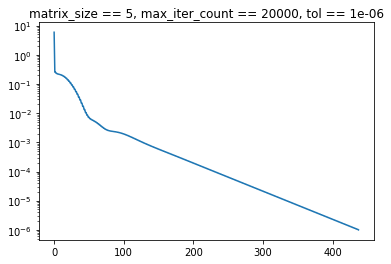

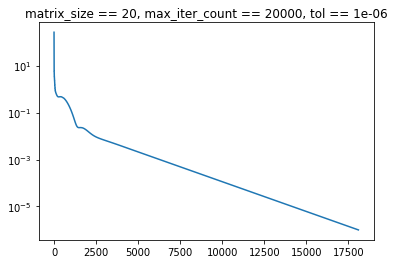

In [24]:
check_my_solution(5, 20000, 0.000001)
check_my_solution(20, 20000, 0.000001)
